## Import Libraries

In [12]:
import requests
import pandas as pd
import time
from wordcloud import WordCloud
import numpy as np
from matplotlib import pyplot as plt

## Import API Key

In [3]:
import config
api_key = config.api_key
yir_channel_id = 'UCj16_sROSTrwMSWW88fOJeg'

## Make an API Call for videos

In [4]:
pageToken=""
url = 'https://www.googleapis.com/youtube/v3/search?key='+api_key+"&channelId="+yir_channel_id+"&part=snippet,id&order=date&maxResults=10000"+pageToken

response = requests.get(url).json()

## Checking variables I should loop for

In [5]:
response['items']

[{'kind': 'youtube#searchResult',
  'etag': 'Ax6PxyFSuicwJ56Re6WSOcs8y0Y',
  'id': {'kind': 'youtube#video', 'videoId': '-Hqz0v_Wxz8'},
  'snippet': {'publishedAt': '2022-01-21T09:00:00Z',
   'channelId': 'UCj16_sROSTrwMSWW88fOJeg',
   'title': '드디어 만났다💃 소프라노 조수미와 이루마의 찐케미 살펴보기👀｜ Cuore Indigo(꾸오레 인디고)',
   'description': '소프라노 조수미와 작곡가 겸 피아니스트 이루마의 Cuore Indigo(꾸오레 인디고) 못다한 이야기   세계 정상의 아티스트들의 찐케미 ...',
   'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/-Hqz0v_Wxz8/default.jpg',
     'width': 120,
     'height': 90},
    'medium': {'url': 'https://i.ytimg.com/vi/-Hqz0v_Wxz8/mqdefault.jpg',
     'width': 320,
     'height': 180},
    'high': {'url': 'https://i.ytimg.com/vi/-Hqz0v_Wxz8/hqdefault.jpg',
     'width': 480,
     'height': 360}},
   'channelTitle': 'YIRUMA place / 이루마 official',
   'liveBroadcastContent': 'none',
   'publishTime': '2022-01-21T09:00:00Z'}},
 {'kind': 'youtube#searchResult',
  'etag': 'i0bIg67klICYTAiD2CYq4jlzb-g',
  'id': {'kind': 'youtube#video', 'v

In [6]:
response['items'][0]['id']['videoId']

'-Hqz0v_Wxz8'

## Making the dataframe and loading the data

In [7]:
df = pd.DataFrame(columns=['comment'])

In [8]:
# Making for loop to get video id
for video in response['items']:
    if video['id']['kind'] == "youtube#video":
        video_id = video['id']['videoId']
        
        # Collecting the comments from all videos
        url_comment = 'https://www.googleapis.com/youtube/v3/commentThreads?key='+api_key+"&videoId="+video_id+"&part=snippet&maxResults=10000"+pageToken
        response_comment = requests.get(url_comment).json()
        
        for comment in response_comment['items']:
            comments = comment['snippet']['topLevelComment']['snippet']['textDisplay']
            
            df = df.append({'comment': comments}, ignore_index=True)

KeyError: 'items'

In [35]:
print(df)

                                                comment
0                                    Mampir blora abang
1                                             왜이렇게 잘생기심
2     안녕하세요. s.j레몬트리입니다. 먼저 잘 못된 정보를 시청자님께 알려 드린 점 진...
3             Sehat selalu bang, kiss the rain mu keren
4                      와 영상 재밌게 보고 갑니다 너무 좋다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
...                                                 ...
2905                                              멋져요😭😭
2906  from Canada! Thank you for playing in Vancouve...
2907                                       Yaasssss!!!!
2908  Hiiiiii my favorite musician~~ comment from Ch...
2909   초대해 주셔서 감사해요 :)  아, 그리고 yeah~~~에 효과음을 넣으십시다 ㅋㅋㅋㅋ

[2910 rows x 1 columns]


## Fun part -- making the wordcloud

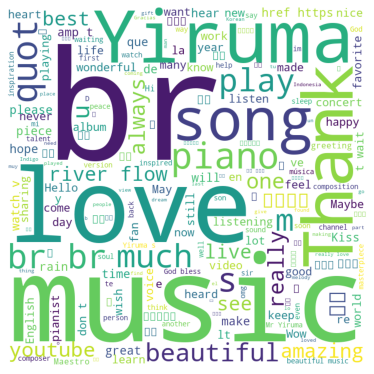

<Figure size 432x288 with 0 Axes>

In [17]:
up_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df["comment"]: 

    tokens = arg.split()  
      
    up_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(up_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
plt.savefig("WordCloud.png")